In [1]:
import numpy as np
import pandas as pd
import os

***IMPORT FILE FROM DATA CLEANING NOTEBOOK***

In [2]:
#import clean and cat data
directory = os.getcwd()
data_clean = pd.read_csv(directory + '/EMS_2017_2018_clean.csv', sep=',') 
data_cat = pd.read_csv(directory + '/EMS_2017_2018_cat.csv', sep=',') 

#create data work; removing cols with missing val indicators and cols with only 1 value
data_wrk = data_cat.drop(['Unnamed: 0', 'Unnamed: 0.1', "VALID_DISPATCH_RSPNS_TIME_INDC", "VALID_INCIDENT_RSPNS_TIME_INDC", "SPECIAL_EVENT_INDICATOR", "STANDBY_INDICATOR", "ZIPCODE_mv", "PRECINCT_mv", "CITYCOUNCILDISTRICT_mv", "COMMUNITYDISTRICT_mv", "COMMUNITYSCHOOLDISTRICT_mv", "CONGRESSIONALDISTRICT_mv" ], axis = 1)
data_wrk = data_wrk.drop([1094377,1241464],axis=0) #drop where Borough is unknown

#create cat_values df
a = data_clean[["CAD_INCIDENT_ID","INITIAL_CALL_TYPE", "HELD_INDICATOR", "BOROUGH", "INCIDENT_DISPATCH_AREA", "TRANSFER_INDICATOR"]]
b = data_cat[["INITIAL_CALL_TYPE", "HELD_INDICATOR", "BOROUGH", "INCIDENT_DISPATCH_AREA", "TRANSFER_INDICATOR"]] 
frames = [a,b]
cat_values = pd.concat(frames, axis = 1)

In [3]:
data_wrk[:10]

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR
0,183654386,12/31/2018 11:59:46 PM,14,2,12/31/2018 11:59:54 PM,8,01/01/2019 12:00:51 AM,01/01/2019 12:07:27 AM,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0
1,183654358,12/31/2018 11:49:42 PM,92,2,12/31/2018 11:50:07 PM,25,12/31/2018 11:50:27 PM,12/31/2018 11:55:10 PM,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0
2,183654307,12/31/2018 11:38:46 PM,92,2,12/31/2018 11:39:11 PM,25,12/31/2018 11:39:44 PM,12/31/2018 11:41:00 PM,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0
3,183654254,12/31/2018 11:24:58 PM,81,6,12/31/2018 11:25:09 PM,11,12/31/2018 11:25:37 PM,12/31/2018 11:32:03 PM,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0
4,183654246,12/31/2018 11:23:35 PM,84,7,12/31/2018 11:23:45 PM,10,12/31/2018 11:23:57 PM,12/31/2018 11:38:33 PM,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0
5,183654212,12/31/2018 11:12:16 PM,30,7,12/31/2018 11:12:36 PM,20,12/31/2018 11:12:45 PM,12/31/2018 11:23:38 PM,682.0,662.0,0,1,12,11218.0,72.0,39.0,307.0,15.0,9.0,0
6,183654207,12/31/2018 11:11:42 PM,92,2,12/31/2018 11:11:57 PM,15,12/31/2018 11:12:22 PM,12/31/2018 11:22:05 PM,623.0,608.0,0,1,12,11217.0,88.0,33.0,302.0,15.0,8.0,0
7,183654202,12/31/2018 11:10:33 PM,73,3,12/31/2018 11:10:50 PM,17,12/31/2018 11:12:07 PM,12/31/2018 11:17:52 PM,439.0,422.0,0,1,12,11238.0,78.0,35.0,302.0,13.0,8.0,0
8,183654194,12/31/2018 11:08:20 PM,30,7,12/31/2018 11:08:54 PM,34,12/31/2018 11:09:23 PM,12/31/2018 11:27:31 PM,1151.0,1117.0,0,1,12,11205.0,88.0,35.0,302.0,13.0,8.0,0
9,183654183,12/31/2018 11:06:25 PM,39,3,12/31/2018 11:06:41 PM,16,12/31/2018 11:07:07 PM,12/31/2018 11:17:39 PM,674.0,658.0,0,1,12,11238.0,79.0,35.0,303.0,13.0,8.0,0


***CONVERT TO DATE TIME OBJECTS***

In [4]:
data_wrk["INCIDENT_DATETIME"] = pd.to_datetime(data_wrk["INCIDENT_DATETIME"])
data_wrk["FIRST_ASSIGNMENT_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ASSIGNMENT_DATETIME"])
data_wrk["FIRST_ACTIVATION_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ACTIVATION_DATETIME"])
data_wrk["FIRST_ON_SCENE_DATETIME"] = pd.to_datetime(data_wrk["FIRST_ON_SCENE_DATETIME"])

In [5]:
data_wrk.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0


***Extracting hour, weekday, month from datetime objects***

In [9]:
data_wrk["INCIDENT_Hour"]=data_wrk["INCIDENT_DATETIME"].dt.hour
data_wrk["INCIDENT_Day"]=data_wrk["INCIDENT_DATETIME"].dt.weekday
data_wrk["INCIDENT_Month"]=data_wrk["INCIDENT_DATETIME"].dt.month

data_wrk["FIRST_ASSIGNMENT_Hour"]=data_wrk["FIRST_ASSIGNMENT_DATETIME"].dt.hour
data_wrk["FIRST_ASSIGNMENT_Day"]=data_wrk["FIRST_ASSIGNMENT_DATETIME"].dt.weekday
data_wrk["FIRST_ASSIGNMENT_Month"]=data_wrk["FIRST_ASSIGNMENT_DATETIME"].dt.month

data_wrk["FIRST_ACTIVATION_Hour"]=data_wrk["FIRST_ACTIVATION_DATETIME"].dt.hour
data_wrk["FIRST_ACTIVATION_Day"]=data_wrk["FIRST_ACTIVATION_DATETIME"].dt.weekday
data_wrk["FIRST_ACTIVATION_Month"]=data_wrk["FIRST_ACTIVATION_DATETIME"].dt.month

data_wrk["FIRST_ON_SCENE_Hour"]=data_wrk["FIRST_ON_SCENE_DATETIME"].dt.hour
data_wrk["FIRST_ON_SCENE_Day"]=data_wrk["FIRST_ON_SCENE_DATETIME"].dt.weekday
data_wrk["FIRST_ON_SCENE_Month"]=data_wrk["FIRST_ON_SCENE_DATETIME"].dt.month

In [15]:
pd.set_option('display.max_columns', None)

In [18]:
data_wrk.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,TRANSFER_INDICATOR,INCIDENT_Hour,INCIDENT_Day,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Day,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Day,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Day,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,1,12,11201.0,84.0,35.0,302.0,13.0,8.0,0,23,0,12,23,0,12,0,1,1,0,1,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,8.0,0,23,0,12,23,0,12,23,0,12,23,0,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,7.0,0,23,0,12,23,0,12,23,0,12,23,0,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,1,12,11201.0,84.0,33.0,302.0,13.0,7.0,0,23,0,12,23,0,12,23,0,12,23,0,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,1,12,11215.0,78.0,39.0,306.0,15.0,9.0,0,23,0,12,23,0,12,23,0,12,23,0,12


***Export csv with Date Time objects***

In [19]:
#exported file with all date time conversions and new time cols
data_wrk.to_csv("EMS_2017_2018_cat_final_calltype_notgrp.csv", date_format='%Y-%m-%d %H:%M:%S', index=False)

***IMPORT CLEAN DATA FILE*** 

In [253]:
#import exported file above to do remainder of cleaning

directory = os.getcwd()
data = pd.read_csv(directory + '/EMS_2017_2018_cat_final_calltype_notgrp.csv', sep=',') 

In [254]:
data.shape

(2730670, 32)

In [255]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,...,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Day,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Day,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Day,FIRST_ON_SCENE_Month
0,183654386,2018-12-31 23:59:46,14,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,...,12,23,0,12,0,1,1,0,1,1
1,183654358,2018-12-31 23:49:42,92,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,...,12,23,0,12,23,0,12,23,0,12
2,183654307,2018-12-31 23:38:46,92,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,...,12,23,0,12,23,0,12,23,0,12
3,183654254,2018-12-31 23:24:58,81,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,...,12,23,0,12,23,0,12,23,0,12
4,183654246,2018-12-31 23:23:35,84,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,...,12,23,0,12,23,0,12,23,0,12


In [256]:
#checking if datetime objects
pd.DatetimeIndex(data['INCIDENT_DATETIME']).month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             3,  1, 11, 11, 11, 11, 11, 11, 11,  6],
           dtype='int64', name='INCIDENT_DATETIME', length=2730670)

In [257]:
pd.DatetimeIndex(data['FIRST_ON_SCENE_DATETIME']).hour

Int64Index([ 0, 23, 23, 23, 23, 23, 23, 23, 23, 23,
            ...
             8, 20, 14, 14, 10, 16, 16, 14, 14,  9],
           dtype='int64', name='FIRST_ON_SCENE_DATETIME', length=2730670)

***OUTLIERS***

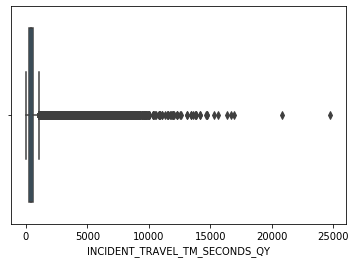

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot with all data
sns.boxplot(data['INCIDENT_TRAVEL_TM_SECONDS_QY'])

In [259]:
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe()

count    2.730670e+06
mean     4.890990e+02
std      3.646019e+02
min      1.000000e+00
25%      2.850000e+02
50%      4.060000e+02
75%      5.810000e+02
max      2.476500e+04
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

Travel time > 17min is considered an outlier based on the IQR added to Q3. This is a very low threshold to place on the data especially since there are still many cases where the travel time is much greater or for example, the dispatch centre may be further from the incident location. We do not know these distances because they were not provided in the dataset. To allow for these considerations, we have chosen a threshold travel time of 1 hour. We made this assumption because NYC is an urban city and standard travel times should fall within the IQR we already calculated. However, to allow for special circumstances (ie. snowstorms, etc), we have increased the threshold to 1 hour.

In [260]:
#calculating outlier threshold
data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']+1.5*(data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['75%']-data['INCIDENT_TRAVEL_TM_SECONDS_QY'].describe(include='all').loc['25%'])

1025.0

In [261]:
#num of rows >outlier threshold
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 1025].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

161623

In [262]:
#num of rows >1hr travel time
data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] > 3600].count()['INCIDENT_TRAVEL_TM_SECONDS_QY']

2952

In [263]:
#save df with only rows that are <=1hr travel time
data_wrk = data[data['INCIDENT_TRAVEL_TM_SECONDS_QY'] <= 3600]

In [264]:
data_wrk.shape

(2727718, 32)

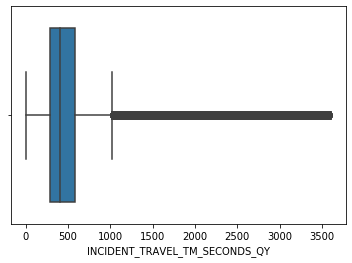

In [265]:
#boxplot without outliers; only travel times <=1hr
sns.boxplot(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'])

***REMOVING SPECIFIC CALL TYPES***

***Transfer Indicator***

In [266]:
#check num of instances of transfers from Transfer Indicator
data_wrk[data_wrk["TRANSFER_INDICATOR"]==1].count()["TRANSFER_INDICATOR"]

59

In [267]:
#small num of transfers so remove from dataset
data_wrk = data_wrk[data_wrk["TRANSFER_INDICATOR"]==0]

In [268]:
#check only 59 instances removed
data_wrk.shape

(2727659, 32)

In [269]:
transf = collections.Counter(data_wrk["TRANSFER_INDICATOR"])
transf = sorted(transf.items())
transf

[(0, 2727659)]

In [270]:
#drop Transfer Indicator column - all 0s
data_wrk = data_wrk.drop(columns = "TRANSFER_INDICATOR")

***Call Type = Transfer***

In [271]:
#check num of instances of transfer from Initial Call type
data_wrk[data_wrk["INITIAL_CALL_TYPE"]==89].count()["INITIAL_CALL_TYPE"]

37

In [272]:
#small num of transfers so remove from dataset
data_wrk = data_wrk[data_wrk["INITIAL_CALL_TYPE"]!=89]

In [273]:
#check only 37 instances removed
data_wrk.shape

(2727622, 31)

***Call Type = SAFE***

In [274]:
#No description of "SAFE"; check num of instances of "SAFE"
data_wrk[data_wrk["INITIAL_CALL_TYPE"]==77].count()["INITIAL_CALL_TYPE"]

693

In [275]:
#"SAFE" not valuable to us so delete from dataset
data_wrk = data_wrk[data_wrk["INITIAL_CALL_TYPE"]!=77]

In [276]:
#check 693 instances removed
data_wrk.shape

(2726929, 31)

***GROUPING CALL TYPES***

Grouping call types done in Excel workbook where descriptions were provided by the EMS data source. Call types grouped based on description and implemented into dataset.

In [277]:
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==0) | (data_wrk["INITIAL_CALL_TYPE"]==1)].head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,...,INCIDENT_Month,FIRST_ASSIGNMENT_Hour,FIRST_ASSIGNMENT_Day,FIRST_ASSIGNMENT_Month,FIRST_ACTIVATION_Hour,FIRST_ACTIVATION_Day,FIRST_ACTIVATION_Month,FIRST_ON_SCENE_Hour,FIRST_ON_SCENE_Day,FIRST_ON_SCENE_Month
17,183653890,2018-12-31 21:56:21,1,5,2018-12-31 21:56:49,28,2018-12-31 21:57:00,2018-12-31 22:01:56,335.0,307.0,...,12,21,0,12,21,0,12,22,0,12
99,183651012,2018-12-31 08:32:21,1,5,2018-12-31 08:32:29,8,2018-12-31 08:32:57,2018-12-31 08:40:17,476.0,468.0,...,12,8,0,12,8,0,12,8,0,12
148,183643186,2018-12-30 18:27:38,1,5,2018-12-30 18:27:50,12,2018-12-30 18:28:00,2018-12-30 18:36:00,502.0,490.0,...,12,18,6,12,18,6,12,18,6,12
174,183642060,2018-12-30 13:10:20,1,5,2018-12-30 13:10:27,7,2018-12-30 13:10:47,2018-12-30 13:23:05,765.0,758.0,...,12,13,6,12,13,6,12,13,6,12
191,183641487,2018-12-30 10:08:52,1,5,2018-12-30 10:09:08,16,2018-12-30 10:09:20,2018-12-30 10:12:59,247.0,231.0,...,12,10,6,12,10,6,12,10,6,12


In [278]:
#Abdominal
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==0) | (data_wrk["INITIAL_CALL_TYPE"]==1) ,"INITIAL_CALL_TYPE"]=0

In [279]:
#Altered Mental Status
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==3) | (data_wrk["INITIAL_CALL_TYPE"]==4) ,"INITIAL_CALL_TYPE"]=1

In [280]:
#Amputation
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==5) | (data_wrk["INITIAL_CALL_TYPE"]==6) ,"INITIAL_CALL_TYPE"]=2

In [281]:
#Anaphylaxis
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==7 ,"INITIAL_CALL_TYPE"]=3

In [282]:
#Cardiac
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==8) | (data_wrk["INITIAL_CALL_TYPE"]==13) |(data_wrk["INITIAL_CALL_TYPE"]==14) |(data_wrk["INITIAL_CALL_TYPE"]==15) ,"INITIAL_CALL_TYPE"]=4

In [283]:
#Asthma
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==9) | (data_wrk["INITIAL_CALL_TYPE"]==10) ,"INITIAL_CALL_TYPE"]=5

In [284]:
#Burn
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==11) | (data_wrk["INITIAL_CALL_TYPE"]==12) ,"INITIAL_CALL_TYPE"]=6

In [285]:
#Child abuse
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==16 ,"INITIAL_CALL_TYPE"]=7

In [286]:
#Choking
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==17 ,"INITIAL_CALL_TYPE"]=8

In [287]:
#Hypothermia
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==18 ,"INITIAL_CALL_TYPE"]=9

In [288]:
#Stroke
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==19) | (data_wrk["INITIAL_CALL_TYPE"]==20)| (data_wrk["INITIAL_CALL_TYPE"]==21) | (data_wrk["INITIAL_CALL_TYPE"]==22),"INITIAL_CALL_TYPE"]=10

In [289]:
#Death
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==23) | (data_wrk["INITIAL_CALL_TYPE"]==27) ,"INITIAL_CALL_TYPE"]=11

In [290]:
#Respiratory
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==24) | (data_wrk["INITIAL_CALL_TYPE"]==25)| (data_wrk["INITIAL_CALL_TYPE"]==26) | (data_wrk["INITIAL_CALL_TYPE"]==75) | (data_wrk["INITIAL_CALL_TYPE"]==76) | (data_wrk["INITIAL_CALL_TYPE"]==41)  ,"INITIAL_CALL_TYPE"]=12


In [291]:
#Drown
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==28 ,"INITIAL_CALL_TYPE"]=13

In [292]:
#Drug
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==29 ,"INITIAL_CALL_TYPE"]=14

In [293]:
#Psych
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==30) | (data_wrk["INITIAL_CALL_TYPE"]==31) | (data_wrk["INITIAL_CALL_TYPE"]==32),"INITIAL_CALL_TYPE"]=15

In [294]:
#Electrocution
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==33 ,"INITIAL_CALL_TYPE"]=16

In [295]:
#Gyno & Obstetrics
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==35) | (data_wrk["INITIAL_CALL_TYPE"]==36) | (data_wrk["INITIAL_CALL_TYPE"]==63)| (data_wrk["INITIAL_CALL_TYPE"]==64)| (data_wrk["INITIAL_CALL_TYPE"]==65)| (data_wrk["INITIAL_CALL_TYPE"]==66)| (data_wrk["INITIAL_CALL_TYPE"]==67),"INITIAL_CALL_TYPE"]=17



In [296]:
#Heat
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==37 ,"INITIAL_CALL_TYPE"]=18

In [297]:
#Hypertension
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==38 ,"INITIAL_CALL_TYPE"]=19

In [298]:
#Internal Bleeding
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==39) | (data_wrk["INITIAL_CALL_TYPE"]==40) ,"INITIAL_CALL_TYPE"]=20

In [299]:
#Injury
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==42) | (data_wrk["INITIAL_CALL_TYPE"]==43) | (data_wrk["INITIAL_CALL_TYPE"]==44)| (data_wrk["INITIAL_CALL_TYPE"]==59),"INITIAL_CALL_TYPE"]=21


In [300]:
#Jumper
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==45) | (data_wrk["INITIAL_CALL_TYPE"]==46) ,"INITIAL_CALL_TYPE"]=22

In [301]:
#Fire
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==47) | (data_wrk["INITIAL_CALL_TYPE"]==48) | (data_wrk["INITIAL_CALL_TYPE"]==49)| (data_wrk["INITIAL_CALL_TYPE"]==50)| (data_wrk["INITIAL_CALL_TYPE"]==34)| (data_wrk["INITIAL_CALL_TYPE"]==51)| (data_wrk["INITIAL_CALL_TYPE"]==53)| (data_wrk["INITIAL_CALL_TYPE"]==54)| (data_wrk["INITIAL_CALL_TYPE"]==52),"INITIAL_CALL_TYPE"]=23


In [302]:
#Medication Reaction
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==55) | (data_wrk["INITIAL_CALL_TYPE"]==56) | (data_wrk["INITIAL_CALL_TYPE"]==57),"INITIAL_CALL_TYPE"]=24


In [303]:
#Car Accident
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==60) | (data_wrk["INITIAL_CALL_TYPE"]==61) | (data_wrk["INITIAL_CALL_TYPE"]==62),"INITIAL_CALL_TYPE"]=25


In [304]:
#Police Incident
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==69) | (data_wrk["INITIAL_CALL_TYPE"]==70),"INITIAL_CALL_TYPE"]=26


In [305]:
#Sick
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==71) | (data_wrk["INITIAL_CALL_TYPE"]==72) | (data_wrk["INITIAL_CALL_TYPE"]==82)| (data_wrk["INITIAL_CALL_TYPE"]==83)| (data_wrk["INITIAL_CALL_TYPE"]==84)| (data_wrk["INITIAL_CALL_TYPE"]==85)| (data_wrk["INITIAL_CALL_TYPE"]==81)| (data_wrk["INITIAL_CALL_TYPE"]==58),"INITIAL_CALL_TYPE"]=27


In [306]:
#Pedestrian Struck
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==73 ,"INITIAL_CALL_TYPE"]=28

In [307]:
#Rape
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==74 ,"INITIAL_CALL_TYPE"]=29

In [308]:
#Seizure
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==78) | (data_wrk["INITIAL_CALL_TYPE"]==79)| (data_wrk["INITIAL_CALL_TYPE"]==88),"INITIAL_CALL_TYPE"]=30


In [309]:
#Shooting
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==80) | (data_wrk["INITIAL_CALL_TYPE"]==2),"INITIAL_CALL_TYPE"]=31

In [310]:
#Stabbing
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==86 ,"INITIAL_CALL_TYPE"]=32

In [311]:
#Epilepsy
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==87 ,"INITIAL_CALL_TYPE"]=33

In [312]:
#Trauma
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==90) | (data_wrk["INITIAL_CALL_TYPE"]==91),"INITIAL_CALL_TYPE"]=34

In [313]:
#Unconscious
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==92) | (data_wrk["INITIAL_CALL_TYPE"]==93),"INITIAL_CALL_TYPE"]=35

In [314]:
#Venom
data_wrk.loc[data_wrk["INITIAL_CALL_TYPE"]==95 ,"INITIAL_CALL_TYPE"]=36

In [315]:
#Unknown
data_wrk.loc[(data_wrk["INITIAL_CALL_TYPE"]==68) | (data_wrk["INITIAL_CALL_TYPE"]==94),"INITIAL_CALL_TYPE"]=37

***Check counter of call types - down to 38 categories***

In [316]:
import collections
from collections import Counter

In [317]:
#checking that all call type categories have been converted and that they only go up to 37
call_type_cat = collections.Counter(data_wrk["INITIAL_CALL_TYPE"])
call_type_cat = sorted(call_type_cat.items())
call_type_cat

[(0, 107954),
 (1, 44648),
 (3, 16339),
 (4, 250979),
 (5, 27996),
 (6, 4828),
 (7, 304),
 (8, 3414),
 (9, 4181),
 (10, 46821),
 (11, 8),
 (12, 238657),
 (13, 869),
 (14, 170530),
 (15, 229587),
 (16, 415),
 (17, 46221),
 (18, 1564),
 (19, 10000),
 (20, 23255),
 (21, 436836),
 (22, 3458),
 (23, 2472),
 (24, 5311),
 (25, 81161),
 (26, 5160),
 (27, 476836),
 (28, 39165),
 (29, 435),
 (30, 23829),
 (31, 5488),
 (32, 11586),
 (33, 47821),
 (34, 10176),
 (35, 140140),
 (36, 34),
 (37, 208451)]

***EXPORT NOW FOR CLEAN DATASET WITHOUT ONE HOT ENCODING***

In [318]:
#exported file with grouped call types
data_wrk.to_csv("EMS_2017_2018_cat_final.csv", date_format='%Y-%m-%d %H:%M:%S', index=False)

***ONE HOT ENCODING***

In [441]:
#import exported file above to do one hot encoding (checkpoint)

directory = os.getcwd()
data = pd.read_csv(directory + '/EMS_2017_2018_cat_final.csv', sep=',') 

***Initial Call Type***

In [442]:
#find all unique call type nums
call_type = sorted(data["INITIAL_CALL_TYPE"].unique())

In [443]:
#create new col names based on unique values of call type - add "T" to front so no conflicts in future col names
arr = []
for i in call_type:
    arr.append("".join(["T",str(i)]))
arr

['T0',
 'T1',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24',
 'T25',
 'T26',
 'T27',
 'T28',
 'T29',
 'T30',
 'T31',
 'T32',
 'T33',
 'T34',
 'T35',
 'T36',
 'T37']

In [444]:
#Onehot encoding INITIAL_CALL_TYPE
onehot_calltype = pd.get_dummies(data["INITIAL_CALL_TYPE"])
onehot_calltype.columns = arr

In [445]:
onehot_calltype.head()

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [446]:
data = data.drop(columns = "INITIAL_CALL_TYPE",axis=1)
data = data.join(onehot_calltype)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,1,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,1,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [447]:
data.shape

(2726929, 67)

***Borough***

In [448]:
#Onehot encoding BOROUGH
onehot_borough = pd.get_dummies(data["BOROUGH"])
#rename col names so they don't overlap with call type
onehot_borough.columns = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]
onehot_borough.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [449]:
data = data.drop(columns = "BOROUGH",axis=1)
data = data.join(onehot_borough)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,T33,T34,T35,T36,T37,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,1,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,1,0,0,0,1,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,1,0,0,0,1,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,1,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,1,0,0,0


In [450]:
data.shape

(2726929, 71)

***Zipcode***

In [451]:
#Onehot encoding BOROUGH
onehot_zipcode = pd.get_dummies(data["ZIPCODE"])
onehot_zipcode.head()

,10000.0,10001.0,10002.0,10003.0,10004.0,10005.0,10006.0,10007.0,10009.0,10010.0,...,11433.0,11434.0,11435.0,11436.0,11691.0,11692.0,11693.0,11694.0,11695.0,11697.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [452]:
data = data.drop(columns = "ZIPCODE",axis=1)
data = data.join(onehot_zipcode)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,11433.0,11434.0,11435.0,11436.0,11691.0,11692.0,11693.0,11694.0,11695.0,11697.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [453]:
data.shape

(2726929, 305)

***Incident Dispatch Area***

In [454]:
#find all unique dispatch area codes
disp_area = sorted(data["INCIDENT_DISPATCH_AREA"].unique())

In [455]:
#create new col names based on unique values of dispatch area - add "A" to front so no conflicts in future col names
arr = []
for i in disp_area:
    arr.append("".join(["A",str(i)]))
arr

['A0',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34']

In [456]:
#Onehot encoding dispatch area
onehot_disp_area = pd.get_dummies(data["INCIDENT_DISPATCH_AREA"])
onehot_disp_area.columns = arr

In [457]:
onehot_disp_area.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
data = data.drop(columns = "INCIDENT_DISPATCH_AREA",axis=1)
data = data.join(onehot_disp_area)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
data.shape

(2726929, 339)

***Police Precinct***

In [460]:
#find all unique police precinct names
precinct = sorted(data["POLICEPRECINCT"].unique())

In [461]:
#create new col names based on unique values of precinct - add "P" to front so no conflicts in future col names
arr = []
for i in precinct:
    arr.append("".join(["P",str(i)]))
arr

['P1.0',
 'P5.0',
 'P6.0',
 'P7.0',
 'P9.0',
 'P10.0',
 'P13.0',
 'P14.0',
 'P17.0',
 'P18.0',
 'P19.0',
 'P20.0',
 'P22.0',
 'P23.0',
 'P24.0',
 'P25.0',
 'P26.0',
 'P28.0',
 'P30.0',
 'P32.0',
 'P33.0',
 'P34.0',
 'P40.0',
 'P41.0',
 'P42.0',
 'P43.0',
 'P44.0',
 'P45.0',
 'P46.0',
 'P47.0',
 'P48.0',
 'P49.0',
 'P50.0',
 'P52.0',
 'P60.0',
 'P61.0',
 'P62.0',
 'P63.0',
 'P66.0',
 'P67.0',
 'P68.0',
 'P69.0',
 'P70.0',
 'P71.0',
 'P72.0',
 'P73.0',
 'P75.0',
 'P76.0',
 'P77.0',
 'P78.0',
 'P79.0',
 'P81.0',
 'P83.0',
 'P84.0',
 'P88.0',
 'P90.0',
 'P94.0',
 'P100.0',
 'P101.0',
 'P102.0',
 'P103.0',
 'P104.0',
 'P105.0',
 'P106.0',
 'P107.0',
 'P108.0',
 'P109.0',
 'P110.0',
 'P111.0',
 'P112.0',
 'P113.0',
 'P114.0',
 'P115.0',
 'P120.0',
 'P121.0',
 'P122.0',
 'P123.0']

In [462]:
#Onehot encoding dispatch area
onehot_precinct = pd.get_dummies(data["POLICEPRECINCT"])
onehot_precinct.columns = arr

In [463]:
onehot_precinct.head()

,P1.0,P5.0,P6.0,P7.0,P9.0,P10.0,P13.0,P14.0,P17.0,P18.0,...,P110.0,P111.0,P112.0,P113.0,P114.0,P115.0,P120.0,P121.0,P122.0,P123.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [464]:
data = data.drop(columns = "POLICEPRECINCT",axis=1)
data = data.join(onehot_precinct)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,P110.0,P111.0,P112.0,P113.0,P114.0,P115.0,P120.0,P121.0,P122.0,P123.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [465]:
data.shape

(2726929, 415)

***City Council District***

In [466]:
#find all unique city council districts
city_counc = sorted(data["CITYCOUNCILDISTRICT"].unique())

In [467]:
#create new col names based on unique values of city council district - add "City_" to front so no conflicts in future col names
arr = []
for i in city_counc:
    arr.append("".join(["City_",str(i)]))
arr

['City_1.0',
 'City_2.0',
 'City_3.0',
 'City_4.0',
 'City_5.0',
 'City_6.0',
 'City_7.0',
 'City_8.0',
 'City_9.0',
 'City_10.0',
 'City_11.0',
 'City_12.0',
 'City_13.0',
 'City_14.0',
 'City_15.0',
 'City_16.0',
 'City_17.0',
 'City_18.0',
 'City_19.0',
 'City_20.0',
 'City_21.0',
 'City_22.0',
 'City_23.0',
 'City_24.0',
 'City_25.0',
 'City_26.0',
 'City_27.0',
 'City_28.0',
 'City_29.0',
 'City_30.0',
 'City_31.0',
 'City_32.0',
 'City_33.0',
 'City_34.0',
 'City_35.0',
 'City_36.0',
 'City_37.0',
 'City_38.0',
 'City_39.0',
 'City_40.0',
 'City_41.0',
 'City_42.0',
 'City_43.0',
 'City_44.0',
 'City_45.0',
 'City_46.0',
 'City_47.0',
 'City_48.0',
 'City_49.0',
 'City_50.0',
 'City_51.0']

In [468]:
#Onehot encoding city council district
onehot_city_counc = pd.get_dummies(data["CITYCOUNCILDISTRICT"])
onehot_city_counc.columns = arr

In [469]:
onehot_city_counc.head()

,City_1.0,City_2.0,City_3.0,City_4.0,City_5.0,City_6.0,City_7.0,City_8.0,City_9.0,City_10.0,...,City_42.0,City_43.0,City_44.0,City_45.0,City_46.0,City_47.0,City_48.0,City_49.0,City_50.0,City_51.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
data = data.drop(columns = "CITYCOUNCILDISTRICT",axis=1)
data = data.join(onehot_city_counc)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,City_42.0,City_43.0,City_44.0,City_45.0,City_46.0,City_47.0,City_48.0,City_49.0,City_50.0,City_51.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [471]:
data.shape

(2726929, 465)

***Community District***

In [472]:
#find all unique community districts
cmty = sorted(data["COMMUNITYDISTRICT"].unique())

In [473]:
#create new col names based on unique values of community district - add "Comm_" to front so no conflicts in future col names
arr = []
for i in cmty:
    arr.append("".join(["Comm_",str(i)]))
arr

['Comm_101.0',
 'Comm_102.0',
 'Comm_103.0',
 'Comm_104.0',
 'Comm_105.0',
 'Comm_106.0',
 'Comm_107.0',
 'Comm_108.0',
 'Comm_109.0',
 'Comm_110.0',
 'Comm_111.0',
 'Comm_112.0',
 'Comm_164.0',
 'Comm_201.0',
 'Comm_202.0',
 'Comm_203.0',
 'Comm_204.0',
 'Comm_205.0',
 'Comm_206.0',
 'Comm_207.0',
 'Comm_208.0',
 'Comm_209.0',
 'Comm_210.0',
 'Comm_211.0',
 'Comm_212.0',
 'Comm_226.0',
 'Comm_227.0',
 'Comm_228.0',
 'Comm_301.0',
 'Comm_302.0',
 'Comm_303.0',
 'Comm_304.0',
 'Comm_305.0',
 'Comm_306.0',
 'Comm_307.0',
 'Comm_308.0',
 'Comm_309.0',
 'Comm_310.0',
 'Comm_311.0',
 'Comm_312.0',
 'Comm_313.0',
 'Comm_314.0',
 'Comm_315.0',
 'Comm_316.0',
 'Comm_317.0',
 'Comm_318.0',
 'Comm_355.0',
 'Comm_356.0',
 'Comm_401.0',
 'Comm_402.0',
 'Comm_403.0',
 'Comm_404.0',
 'Comm_405.0',
 'Comm_406.0',
 'Comm_407.0',
 'Comm_408.0',
 'Comm_409.0',
 'Comm_410.0',
 'Comm_411.0',
 'Comm_412.0',
 'Comm_413.0',
 'Comm_414.0',
 'Comm_480.0',
 'Comm_481.0',
 'Comm_482.0',
 'Comm_483.0',
 'Comm_484

In [474]:
#Onehot encoding community district
onehot_cmty = pd.get_dummies(data["COMMUNITYDISTRICT"])
onehot_cmty.columns = arr

In [475]:
onehot_cmty.head()

,Comm_101.0,Comm_102.0,Comm_103.0,Comm_104.0,Comm_105.0,Comm_106.0,Comm_107.0,Comm_108.0,Comm_109.0,Comm_110.0,...,Comm_414.0,Comm_480.0,Comm_481.0,Comm_482.0,Comm_483.0,Comm_484.0,Comm_501.0,Comm_502.0,Comm_503.0,Comm_595.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [476]:
data = data.drop(columns = "COMMUNITYDISTRICT",axis=1)
data = data.join(onehot_cmty)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Comm_414.0,Comm_480.0,Comm_481.0,Comm_482.0,Comm_483.0,Comm_484.0,Comm_501.0,Comm_502.0,Comm_503.0,Comm_595.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [477]:
data.shape

(2726929, 535)

***Community School District***

In [478]:
#find all unique community school districts
school = sorted(data["COMMUNITYSCHOOLDISTRICT"].unique())

In [479]:
#create new col names based on unique values of community school district - add "Schl_" to front so no conflicts in future col names
arr = []
for i in school:
    arr.append("".join(["Schl_",str(i)]))
arr

['Schl_1.0',
 'Schl_2.0',
 'Schl_3.0',
 'Schl_4.0',
 'Schl_5.0',
 'Schl_6.0',
 'Schl_7.0',
 'Schl_8.0',
 'Schl_9.0',
 'Schl_10.0',
 'Schl_11.0',
 'Schl_12.0',
 'Schl_13.0',
 'Schl_14.0',
 'Schl_15.0',
 'Schl_16.0',
 'Schl_17.0',
 'Schl_18.0',
 'Schl_19.0',
 'Schl_20.0',
 'Schl_21.0',
 'Schl_22.0',
 'Schl_23.0',
 'Schl_24.0',
 'Schl_25.0',
 'Schl_26.0',
 'Schl_27.0',
 'Schl_28.0',
 'Schl_29.0',
 'Schl_30.0',
 'Schl_31.0',
 'Schl_32.0']

In [480]:
#Onehot encoding community school district
onehot_school = pd.get_dummies(data["COMMUNITYSCHOOLDISTRICT"])
onehot_school.columns = arr

In [481]:
onehot_school.head()

,Schl_1.0,Schl_2.0,Schl_3.0,Schl_4.0,Schl_5.0,Schl_6.0,Schl_7.0,Schl_8.0,Schl_9.0,Schl_10.0,...,Schl_23.0,Schl_24.0,Schl_25.0,Schl_26.0,Schl_27.0,Schl_28.0,Schl_29.0,Schl_30.0,Schl_31.0,Schl_32.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [482]:
data = data.drop(columns = "COMMUNITYSCHOOLDISTRICT",axis=1)
data = data.join(onehot_school)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Schl_23.0,Schl_24.0,Schl_25.0,Schl_26.0,Schl_27.0,Schl_28.0,Schl_29.0,Schl_30.0,Schl_31.0,Schl_32.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


In [483]:
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Schl_23.0,Schl_24.0,Schl_25.0,Schl_26.0,Schl_27.0,Schl_28.0,Schl_29.0,Schl_30.0,Schl_31.0,Schl_32.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,0


***Congressional District***

In [484]:
#find all unique congressional districts
congress = sorted(data["CONGRESSIONALDISTRICT"].unique())

In [485]:
#create new col names based on unique values of congressional district - add "Con_" to front so no conflicts in future col names
arr = []
for i in congress:
    arr.append("".join(["Con_",str(i)]))
arr

['Con_3.0',
 'Con_5.0',
 'Con_6.0',
 'Con_7.0',
 'Con_8.0',
 'Con_9.0',
 'Con_10.0',
 'Con_11.0',
 'Con_12.0',
 'Con_13.0',
 'Con_14.0',
 'Con_15.0',
 'Con_16.0']

In [486]:
#Onehot encoding congressional district
onehot_congress = pd.get_dummies(data["CONGRESSIONALDISTRICT"])
onehot_congress.columns = arr

In [487]:
onehot_congress.head()

,Con_3.0,Con_5.0,Con_6.0,Con_7.0,Con_8.0,Con_9.0,Con_10.0,Con_11.0,Con_12.0,Con_13.0,Con_14.0,Con_15.0,Con_16.0
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [488]:
data = data.drop(columns = "CONGRESSIONALDISTRICT",axis=1)
data = data.join(onehot_congress)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Con_7.0,Con_8.0,Con_9.0,Con_10.0,Con_11.0,Con_12.0,Con_13.0,Con_14.0,Con_15.0,Con_16.0
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,1,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,1,0,0,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,1,0,0,0,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,1,0,0,0,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,1,0,0,0,0,0,0,0


In [489]:
data.shape

(2726929, 578)

Only ONE-HOT encode for Activation day - this is the datetime we are most interested in because it is when the EMS vehicle began traveling. Other columns showing time will be approx same anyways so there is no reason to do one-hot encoding on the other columns - it will not provide much new information. We can remove those from the model.

***Activation Day***

In [491]:
#find all unique activation days
activ_day = sorted(data["FIRST_ACTIVATION_Day"].unique())
activ_day

[0, 1, 2, 3, 4, 5, 6]

In [492]:
#create new col names based on unique values of activation day - add "Day_" to front so no conflicts in future col names
arr = []
for i in activ_day:
    arr.append("".join(["Day_",str(i)]))
arr

['Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6']

In [493]:
onehot_activ_day = pd.get_dummies(data["FIRST_ACTIVATION_Day"])
onehot_activ_day.columns = arr

In [494]:
onehot_activ_day.head()

,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [495]:
data = data.drop(columns = "FIRST_ACTIVATION_Day",axis=1)
data = data.join(onehot_activ_day)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Con_14.0,Con_15.0,Con_16.0,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,1,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,1,0,0,0,0,0,0
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,1,0,0,0,0,0,0
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,1,0,0,0,0,0,0
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,1,0,0,0,0,0,0


***Activation Hour***

In [496]:
#find all unique activation hours
activ_hr = sorted(data["FIRST_ACTIVATION_Hour"].unique())
activ_hr

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [497]:
#create new col names based on unique values of activation hr - add "Hr_" to front so no conflicts in future col names
arr = []
for i in activ_hr:
    arr.append("".join(["Hr_",str(i)]))
arr

['Hr_0',
 'Hr_1',
 'Hr_2',
 'Hr_3',
 'Hr_4',
 'Hr_5',
 'Hr_6',
 'Hr_7',
 'Hr_8',
 'Hr_9',
 'Hr_10',
 'Hr_11',
 'Hr_12',
 'Hr_13',
 'Hr_14',
 'Hr_15',
 'Hr_16',
 'Hr_17',
 'Hr_18',
 'Hr_19',
 'Hr_20',
 'Hr_21',
 'Hr_22',
 'Hr_23']

In [498]:
onehot_activ_hr = pd.get_dummies(data["FIRST_ACTIVATION_Hour"])
onehot_activ_hr.columns = arr

In [499]:
onehot_activ_hr.head()

,Hr_0,Hr_1,Hr_2,Hr_3,Hr_4,Hr_5,Hr_6,Hr_7,Hr_8,Hr_9,...,Hr_14,Hr_15,Hr_16,Hr_17,Hr_18,Hr_19,Hr_20,Hr_21,Hr_22,Hr_23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [500]:
data = data.drop(columns = "FIRST_ACTIVATION_Hour",axis=1)
data = data.join(onehot_activ_hr)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Hr_14,Hr_15,Hr_16,Hr_17,Hr_18,Hr_19,Hr_20,Hr_21,Hr_22,Hr_23
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,1
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,1
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,1
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,1


***Activation Month***

In [501]:
#find all unique activation months
activ_month = sorted(data["FIRST_ACTIVATION_Month"].unique())
activ_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [502]:
#create new col names based on unique values of activation month - add "Month_" to front so no conflicts in future col names
arr = []
for i in activ_month:
    arr.append("".join(["Month_",str(i)]))
arr

['Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12']

In [503]:
onehot_activ_month = pd.get_dummies(data["FIRST_ACTIVATION_Month"])
onehot_activ_month.columns = arr

In [504]:
onehot_activ_month.head()

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1


In [505]:
data = data.drop(columns = "FIRST_ACTIVATION_Month",axis=1)
data = data.join(onehot_activ_month)
data.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,183654386,2018-12-31 23:59:46,2,2018-12-31 23:59:54,8,2019-01-01 00:00:51,2019-01-01 00:07:27,461.0,453.0,0,...,0,0,0,0,0,0,0,0,0,0
1,183654358,2018-12-31 23:49:42,2,2018-12-31 23:50:07,25,2018-12-31 23:50:27,2018-12-31 23:55:10,328.0,303.0,0,...,0,0,0,0,0,0,0,0,0,1
2,183654307,2018-12-31 23:38:46,2,2018-12-31 23:39:11,25,2018-12-31 23:39:44,2018-12-31 23:41:00,134.0,109.0,0,...,0,0,0,0,0,0,0,0,0,1
3,183654254,2018-12-31 23:24:58,6,2018-12-31 23:25:09,11,2018-12-31 23:25:37,2018-12-31 23:32:03,425.0,414.0,0,...,0,0,0,0,0,0,0,0,0,1
4,183654246,2018-12-31 23:23:35,7,2018-12-31 23:23:45,10,2018-12-31 23:23:57,2018-12-31 23:38:33,898.0,888.0,0,...,0,0,0,0,0,0,0,0,0,1


***Drop other timestamps and associated day/hour/month: Incident, First_Assignment, First_Activation, First_On_Scene***

In [513]:
data = data.drop(columns = ["CAD_INCIDENT_ID","INCIDENT_DATETIME","FIRST_ASSIGNMENT_DATETIME","FIRST_ACTIVATION_DATETIME","FIRST_ON_SCENE_DATETIME","INCIDENT_Hour","INCIDENT_Day","INCIDENT_Month","FIRST_ASSIGNMENT_Hour","FIRST_ASSIGNMENT_Day","FIRST_ASSIGNMENT_Month","FIRST_ON_SCENE_Hour","FIRST_ON_SCENE_Day","FIRST_ON_SCENE_Month"],axis=1)


In [514]:
#remaining cols
data.columns.get_values()

array(['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
       'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'HELD_INDICATOR', 'T0', 'T1', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8',
       'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17',
       'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26',
       'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35',
       'T36', 'T37', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 10000.0, 10001.0, 10002.0, 10003.0, 10004.0,
       10005.0, 10006.0, 10007.0, 10009.0, 10010.0, 10011.0, 10012.0,
       10013.0, 10014.0, 10016.0, 10017.0, 10018.0, 10019.0, 10020.0,
       10021.0, 10022.0, 10023.0, 10024.0, 10025.0, 10026.0, 10027.0,
       10028.0, 10029.0, 10030.0, 10031.0, 10032.0, 10033.0, 10034.0,
       10035.0, 10036.0, 10037.0, 10038.0, 10039.0, 10040.0, 10041.0,
       10044.0, 10045.0, 10048.0, 10055.0, 10065.0, 10069.0, 10075.0,
       10103.0, 10105.

***EXPORT NOW FOR ONE HOT ENCODED DATASET***

In [515]:
data_wrk.to_csv("EMS_2017_2018_cat_final_onehot.csv", date_format='%Y-%m-%d %H:%M:%S', index=False)